# Embedding Tutorial

Word2Vec is a popular algorithm developed by Google to create word embeddings from a large corpus of text. Word embeddings represent words as vectors in a continuous vector space, capturing semantic meanings such that words with similar meanings have vectors that are closer together. This tutorial will guide you through implementing Word2Vec using Python and the Gensim library.
## 1. Installing Required Libraries

Before diving into the code, ensure that you have the necessary libraries installed. You'll need:

Gensim: For training the Word2Vec model.
NLTK: For text preprocessing, like tokenizing words.

In [1]:
!pip install gensim nltk

## 2. Understanding the Word2Vec Algorithm

Word2Vec comes in two main models:

* Skip-Gram Model: It predicts the context (surrounding words) given the target word.
* CBOW (Continuous Bag of Words): It predicts the target word from its context.

Both models aim to create word embeddings where the relationship between words is preserved based on their usage in the text.

## 3. Loading and Preprocessing Data

You’ll need a text corpus to train the Word2Vec model. For this tutorial, let’s use the NLTK corpus "Gutenberg," which contains several books.

In [2]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
nltk.download('gutenberg')
nltk.download('punkt')

# Load the corpus (Alice in Wonderland for this example)
alice_text = gutenberg.raw('carroll-alice.txt')

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(alice_text)

# Tokenize sentences into words
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Preview a tokenized sentence
print(tokenized_sentences[0])

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['[', 'alice', "'s", 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', '1865', ']', 'chapter', 'i', '.']


## 4. Training a Word2Vec Model

Gensim provides an easy-to-use Word2Vec implementation. To train a model, you can use the following steps:

In [3]:
from gensim.models import Word2Vec

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4, sg=0)

# Summary of the model
print(model)

Word2Vec<vocab=1548, vector_size=100, alpha=0.025>


Parameters:

* `sentences`: Tokenized sentences (list of lists of words).
* `vector_size`: Dimensionality of word embeddings.
* `window`: Maximum distance between the current and predicted word.
* `min_count`: Ignores all words with a frequency lower than this.
* `workers`: Number of CPU cores to use during training.
* `sg`: Skip-gram (`sg=1`) or CBOW (`sg=0`).

## 5. Exploring the Model

Once your model is trained, you can explore word relationships. The following functions are useful for finding word similarities and associations.

### a. Finding Similar Words
You can find words similar to a given word using the `most_similar` method:

In [4]:
similar_words = model.wv.most_similar('alice', topn=5)
print(similar_words)

[('and', 0.9997000098228455), (':', 0.9996814727783203), (',', 0.9996623992919922), ('or', 0.9996567368507385), ('to', 0.9996470212936401)]


This will return the top 5 words most similar to 'alice' based on the trained embeddings.

### b. Word Similarity

You can measure how similar two words are using the `similarity` method:

In [5]:
similarity = model.wv.similarity('alice', 'rabbit')
print(f"Similarity between 'alice' and 'rabbit': {similarity}")

Similarity between 'alice' and 'rabbit': 0.9990416169166565


### c. Visualizing Word Vectors

You can visualize word vectors in 2D space using techniques like PCA (Principal Component Analysis) or t-SNE. Here’s how you can visualize word vectors using PCA:

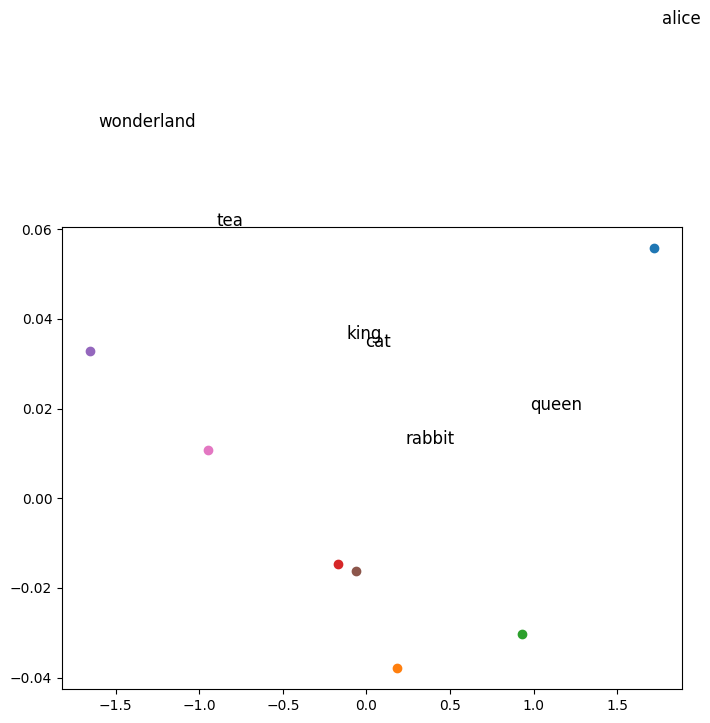

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a subset of words
words = ['alice', 'rabbit', 'queen', 'king', 'wonderland', 'cat', 'tea']

# Get the vectors for the selected words
word_vectors = [model.wv[word] for word in words]

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0] + 0.05, word_vectors_2d[i, 1] + 0.05, word, fontsize=12)
plt.show()

## 6. Saving and Loading the Model

To save the model:

In [ ]:
model.save('word2vec_model')

To load a saved model:

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec.load('word2vec_model')

## 7. Further Applications of Word2Vec

Word2Vec is powerful and has many applications, such as:

* Text classification: Use word embeddings as input features for machine learning models.
* Document similarity: Compare documents based on their word embeddings.
* Question answering systems: Capture relationships between words to build smarter question-answering models.

# Skip-Gram and CBOW

Word2Vec can operate in two modes: CBOW (Continuous Bag of Words) and Skip-gram. The difference between the two lies in how they predict the target words from the context:

* CBOW: Predicts the target word (center word) based on the context (surrounding words).
* Skip-gram: Predicts the context (surrounding words) based on the target word (center word).

Both methods aim to create word embeddings that capture semantic relationships between words, but they do so in opposite ways. CBOW tends to be faster and works better with small datasets, while Skip-gram performs well with large datasets and rare words.

## 1. CBOW Model Implementation

In Gensim, the CBOW model is the default mode for Word2Vec. To explicitly train the Word2Vec model using CBOW, set the `sg` parameter to `0`:

In [7]:
from gensim.models import Word2Vec

# Train a CBOW Word2Vec model
cbow_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4, sg=0)

# Summary of the model
print(cbow_model)

Word2Vec<vocab=1548, vector_size=100, alpha=0.025>


Here, `sg=0` specifies the CBOW model. The rest of the parameters are the same as explained earlier:

* `vector_size`: Dimensionality of the word vectors.
* `window`: The maximum distance between the current and predicted word.
* `min_count`: Ignores all words with a frequency lower than this.
* `workers`: Number of CPU cores used in training.

## 2. Skip-gram Model Implementation

For the Skip-gram model, set the `sg` parameter to `1`:

In [8]:
# Train a Skip-gram Word2Vec model
skipgram_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)

# Summary of the model
print(skipgram_model)


Word2Vec<vocab=1548, vector_size=100, alpha=0.025>


Setting `sg=1` tells Gensim to train the model using Skip-gram.

## 3. Comparing CBOW and Skip-gram

Now that both CBOW and Skip-gram models are trained, you can explore the differences between their word embeddings.

### a. Finding Similar Words (CBOW vs. Skip-gram)
Let’s compare the words most similar to “alice” using both models:

In [9]:
# Most similar words to 'alice' using CBOW
cbow_similar_words = cbow_model.wv.most_similar('alice', topn=5)
print("CBOW - Most similar to 'alice':", cbow_similar_words)

# Most similar words to 'alice' using Skip-gram
skipgram_similar_words = skipgram_model.wv.most_similar('alice', topn=5)
print("Skip-gram - Most similar to 'alice':", skipgram_similar_words)

CBOW - Most similar to 'alice': [('and', 0.9997485876083374), ('or', 0.999728798866272), (':', 0.9997059106826782), ('that', 0.9997042417526245), ('for', 0.9996967315673828)]
Skip-gram - Most similar to 'alice': [('thought', 0.9897785186767578), ('so', 0.9883779287338257), ("'it", 0.9876874089241028), ('hastily', 0.9875296354293823), ('rather', 0.9874232411384583)]


Both models will return similar words based on their respective embeddings, but the results may differ slightly due to the different training mechanisms.

### b. Word Similarity (CBOW vs. Skip-gram)
You can also compare how both models calculate the similarity between two words:

In [10]:
# Similarity between 'alice' and 'rabbit' using CBOW
cbow_similarity = cbow_model.wv.similarity('alice', 'rabbit')
print(f"CBOW - Similarity between 'alice' and 'rabbit': {cbow_similarity}")

# Similarity between 'alice' and 'rabbit' using Skip-gram
skipgram_similarity = skipgram_model.wv.similarity('alice', 'rabbit')
print(f"Skip-gram - Similarity between 'alice' and 'rabbit': {skipgram_similarity}")

CBOW - Similarity between 'alice' and 'rabbit': 0.999299943447113
Skip-gram - Similarity between 'alice' and 'rabbit': 0.9651893973350525


## 4. Evaluating the Models

Once you've trained both CBOW and Skip-gram models, you can evaluate their performance based on various tasks such as word analogy or document similarity.

### c. Word Analogy Example (CBOW vs. Skip-gram)
Let’s test word analogy using both models. For example, “man is to king as woman is to ____”:

In [16]:
# Word analogy task using CBOW
cbow_analogy = cbow_model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("CBOW - Word analogy (man:king, woman:?):", cbow_analogy)

# Word analogy task using Skip-gram
skipgram_analogy = skipgram_model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("Skip-gram - Word analogy (man:king, woman:?):", skipgram_analogy)

CBOW - Word analogy (man:king, woman:?): [('grass', 0.7064976096153259)]
Skip-gram - Word analogy (man:king, woman:?): [('dormouse', 0.9920663237571716)]


The results of the word analogy tasks using CBOW and Skip-gram are interesting, but they seem a bit off compared to the expected result (where typically, "queen" would be a better analogy for "king
" when "man" is removed).

There could be several reasons why these results occurred:

1. **Training Data**: The model was trained on a small dataset (`Alice in Wonderland`), which may not have enough diverse examples of gendered or royal terms (like "king" and "queen"). The book's vocabulary and context might not align with the word analogy task you're performing.

2. **Limited Vocabulary**: Since the corpus doesn't have a wide variety of concepts related to royalty or gender, words like "grass" or "dormouse" (which are more frequent in the text) might surface as high-ranking results.

3. **Model Size**: The vector_size parameter (100 in this case) could also influence the quality of the embeddings. If the embeddings do not capture enough semantic information, unexpected words might show up.

## 5. When to Use CBOW or Skip-gram?

* CBOW:

  * Faster and works well with smaller datasets.
  * Better for frequent words.
  * Good for tasks where you care about the context predicting the word.

* Skip-gram:

  * Slower, but performs better on larger datasets.
  * Works better with rare words.
  * Good for tasks where you want to predict the context from the word.

## 6. Saving and Loading Models

If you want to save and load either the CBOW or Skip-gram models for later use:

In [12]:
# Save models
cbow_model.save('cbow_model')
skipgram_model.save('skipgram_model')

# Load models
cbow_model = Word2Vec.load('cbow_model')
skipgram_model = Word2Vec.load('skipgram_model')